# Final Project: Overview

# Objective

The objective of this project is for you to demonstrate your mastery of the Machine Learning process
**using Neural Networks**.



# Submission requirements

The guidelines will be similar to the Midterm
- you will write a procedure that takes raw data and produces predictions

You will submit a *single* model for evaluation.

**Demonstrate that all cells in your notebook work**

The final cell in your notebook should print the message "Done"
- `print("Done")`
- If we run your notebook and this last cell does not execute your submission will be inadequate

## Testing

*You must perform out of sample testing*.

If you want to perform cross-validation in training, that is fine, but you
must *also* test out of sample to show that you are not over-fitting.

It is up to you to create the out of sample data that you feel best evaluates your model.

We will create holdout data (that we will not show you) for grading.

The procedure you write to make predictions should be able to work on the unseen holdout data
(similar to how it should work for your test set but the holdout set has *no targets*)

    

# The data

Data will be provided to you
- as multiple files in a directory which we refer to as a *data directory*

The reason for this is that the different files may convey different information.

You will be responsible for deciding
- which files to use
- which fields within the files to use

We will give you a data directory for training.

# Submission guidelines

Here are the basics, a code template that you must complete is in the following cells
- you will be required to store  your model in a file
- you will be required to write a procedure `MyModel` that takes two arguments
    - `test_dir`
        - this is a *relative path* to the holdout data directory
    - `model_save_file`
        - this is a *relative path* to the file containing your model
- the holdout data directory is similar in structure to the training data directory
    - but without target labels !  It is your job to predict these.
- your procedure must produce predictions given this holdout data directory

This means that your procedure must
- prepare the files in the holdout data directory similar to the way that they were prepared in the training data directory

We will provide you with a sample data directory that will resemble the holdout -- this is so that you
may test the procedure you write for submission.



## Detailed submission guidelines


In **addition to your notebook that trains/evaluates your model**,
- please also submit the file that contains your trained model.
    - use `saveModel` to put your final, trained model in this file
- We will **not** train your model; we will only use the method `MyModel`
    - which **you** will implement
    - and which uses `loadModel` and the name of the file in which the model was saved
    - this will create the model that we will evaluate


Here is a code template for you to complete
- it will save your model (assuming it is in variable `my_model`)
- it provides the specification for procedure `MyModel`, which *you must complete*


In [1]:
import os
from tensorflow.keras.models import load_model

modelName = "final_model"
model_path = os.path.join(".", modelName)

def saveModel(model, model_path):
    """
    Save a model

    Parameters
    ----------
    model: a Keras model object
    model_path: String.  Relative path to a file in which the model will be stored


    Returns
    -------
    model_save_file: String.  Name of the file in which the model has been saved
        - this will be model_path with the proper file-extension added
    """

    model_save_file = model_path + '.keras'

    model.save(model_save_file)

    print(f"Model saved in {model_save_file:s}; submit with your assignment.")

    return model_save_file

def loadModel(model_save_file):
    model = tf.keras.models.load_model( model_save_file )

    return model

def MyModel(test_dir, model_save_file):
    # YOU MAY NOT change model after this statement !
    model = loadModel(model_save_file)

    # It should run model to create an array of predictions; we initialize it to the empty array for convenience
    predictions = []

    # We need to match your array of predictions with the examples you are predicting
    # The array below (ids) should have a one-to-one correspondence and identify the example your are predicting
    # For Bankruptcy: the Id column
    # For Stock prediction: the date on which you are making a prediction
    ids = []

    # YOUR CODE GOES HERE


    return predictions, ids

# Assign to variable my_model the model that is your final model (the one  you will be evaluated on)
my_model = None # CHANGE None to your model !

# model_save_file = saveModel(my_model, model_path)

# 0. Constants

In [2]:
from typing import Final

DATASET_URL: Final = "https://github.com/rogerli2020/Stock-Prediction-FRE7773-Final-Project/raw/refs/heads/main/Data.tar"
DATA_RELATIVE_PATH: Final = "./Data"
TRAIN_SET_RELATIVE_PATH: Final = "./Data/train"
SAMPLE_SET_RELATIVE_PATH: Final = "./Data/sample"

# 1. Getting and Loading the Data

In [3]:
from typing import Dict
import os
import urllib.request
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

class MyDataset:
  def __init__(self, download_anyway: bool = False) -> None:
    self.train_set : Dict[str, pd.DataFrame] = None
    self.sample_set : Dict[str, pd.DataFrame] = None

    self._download_anyway = download_anyway

    self._load_dataset()

  def _load_dataset(self):
    def load_dataset_from_dir(dir : str) -> dict:
      data_dict = {}
      if not os.path.isdir(dir):
        raise ValueError(f"The provided path '{dir}' is not a directory or does not exist.")
      for file_name in os.listdir(dir):
        if file_name.endswith(".csv"):
          file_path = os.path.join(dir, file_name)
          key = os.path.splitext(file_name)[0]
          try:
            data_dict[key] = pd.read_csv(file_path)
            data_dict[key]['Dt'] = pd.to_datetime(data_dict[key]['Dt'])
            data_dict[key] = data_dict[key].set_index('Dt')
          except Exception as e:
            print(f"Error reading {file_name}: {e}")
      return data_dict

    self._download_dataset()
    self.train_set = load_dataset_from_dir(TRAIN_SET_RELATIVE_PATH)
    self.sample_set = load_dataset_from_dir(SAMPLE_SET_RELATIVE_PATH)
    assert isinstance(self.train_set, dict) and len(self.train_set) > 0, "train_set must be a non-empty dictionary"
    assert isinstance(self.sample_set, dict) and len(self.sample_set) > 0, "sample_set must be a non-empty dictionary"
    print("Dataset loaded!")

  def _download_dataset(self):
    if os.path.isdir(DATA_RELATIVE_PATH) and not self._download_anyway:
      print("Data already exist... Skipping download.")
      return
    try:
      tar_file_path, _ = urllib.request.urlretrieve(DATASET_URL)
      with tarfile.open(tar_file_path, "r") as tar:
          tar.extractall()
    except Exception as e:
      print(f"An error occurred during download or extraction: {e}")
    finally:
      if os.path.exists(tar_file_path):
        os.remove(tar_file_path)

  @staticmethod
  def graph_dataset_df(dataset : pd.DataFrame):
    plt.figure(figsize=(8, 5))

    # Plot each column
    for column in dataset.columns:
        plt.plot(dataset.index, dataset[column], label=column)

    # Set title, labels, and grid
    plt.title("Graph")
    plt.xlabel("Date")
    plt.ylabel("Values")

    # Format x-axis to show Year only
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Tick every year
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as 'Year'

    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

dataset : MyDataset = MyDataset(download_anyway=True)

Dataset loaded!


## 1.1 Trying to Understand the Data

Shape of Data:

In [4]:
print(dataset.train_set['AAPL'].shape)
print(dataset.sample_set['AAPL'].shape)

(4277, 8)
(251, 8)


In [5]:
dataset.sample_set['AAPL'].head()

,Adj Close,Close,Div,Factor,High,Low,Open,Volume
Dt,,,,,,,,
2017-01-03,110.9418,116.15,0.0,1.0,116.3300,114.76,115.80,28781865.0
2017-01-04,110.8176,116.02,0.0,1.0,116.5100,115.75,115.85,21118116.0
2017-01-05,111.3812,116.61,0.0,1.0,116.8642,115.81,115.92,22193587.0
2017-01-06,112.6229,117.91,0.0,1.0,118.1600,116.47,116.78,31751900.0
2017-01-09,113.6545,118.99,0.0,1.0,119.4300,117.94,117.95,33561948.0


## Features:

In [6]:
print(dataset.train_set['AAPL'].columns)

Index(['Adj Close', 'Close', 'Div', 'Factor', 'High', 'Low', 'Open', 'Volume'], dtype='object')


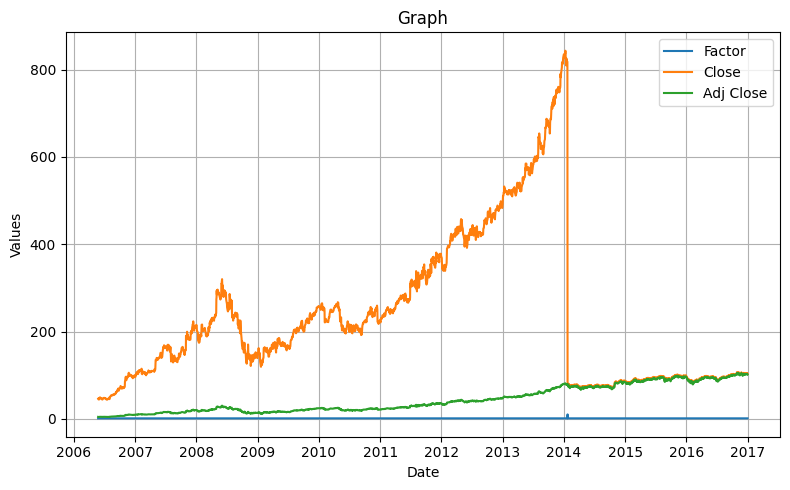

In [7]:
MyDataset.graph_dataset_df(dataset.train_set['MA'][['Factor', 'Close', 'Adj Close']])

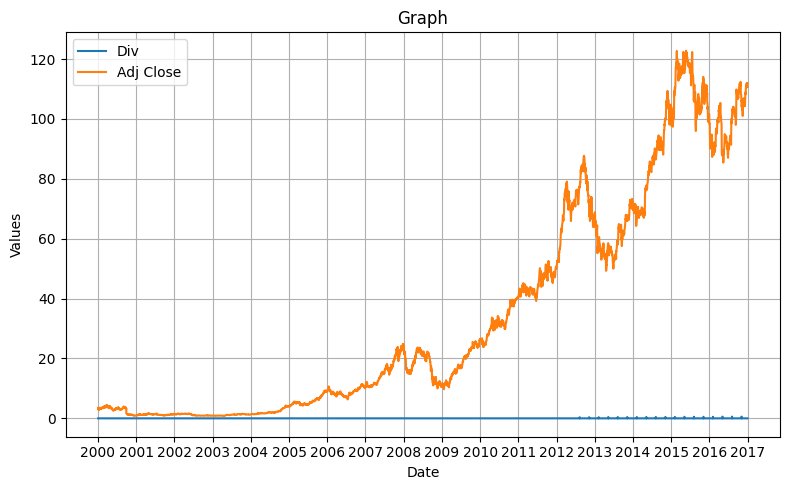

In [8]:
MyDataset.graph_dataset_df(dataset.train_set['AAPL'][['Div', 'Adj Close']])

#2. Feature Engineering

Define the functions for creating features in the FeatureCreator class:

In [13]:
import numpy as np

class FeatureCreator:
  @staticmethod
  def create_return_column_for_single_stock(df : pd.DataFrame):
    """
      Get the daily log returns based on Adj Close.
    """
    df['Return'] = np.log1p(df['Adj Close'].pct_change())
    df.dropna(subset=['Return'], inplace=True)
    return df

  @staticmethod
  def create_volatility_column_for_single_stock(df : pd.DataFrame):
    """
      Get the daily volatility estimate by squaring the daily return.
    """
    if 'Return' not in df.columns:
        print("Warning: 'Return' column not found. Cannot calculate volatility.")
        return df
    df['Volatility'] = df['Return'] ** 2
    df.dropna(subset=['Volatility'], inplace=True)
    return df

  @staticmethod
  def create_return_columns(dataset : MyDataset):
    """
      Get the daily log returns for all stocks based on Adj Close.
    """
    for dataset_dict in [dataset.train_set, dataset.sample_set]:
      for ticker, df in dataset_dict.items():
        dataset_dict[ticker] = FeatureCreator.create_return_column_for_single_stock(df)
    print('Return columns created.')

  @staticmethod
  def create_volatility_columns(dataset : MyDataset):
    """
      Get the daily volatility estimate for all stocks by squaring the daily return.
    """
    for ticker, df in dataset.train_set.items():
      print(f"Creating volatility column for {ticker}")
      dataset.train_set[ticker] = FeatureCreator.create_volatility_column_for_single_stock(df)
    print('Volatility columns created.')

## 2.1 Stock Daily Return

In [19]:
FeatureCreator.create_return_columns(dataset)
print(dataset.sample_set)
MyDataset.graph_dataset_df(dataset.sample_set['MA'][['Return']])
dataset.sample_set['MA']['Variance'] = dataset.sample_set['MA']['Return'] ** 2
MyDataset.graph_dataset_df(dataset.sample_set['MA'][['Variance']])

{'V': None, 'XLE': None, 'CSCO': None, 'INTC': None, 'ACN': None, 'XLRE': None, 'CRM': None, 'GOOG': None, 'FB': None, 'XLY': None, 'MA': None, 'XLI': None, 'XLF': None, 'MSFT': None, 'XLU': None, 'IBM': None, 'SPY': None, 'AAPL': None, 'XLB': None, 'ADBE': None, 'XLK': None, 'NVDA': None, 'XLV': None, 'XLP': None}


TypeError: 'NoneType' object is not subscriptable

## 2.2 Daily Volatility Measure

In [ ]:
# FeatureCreator.create_volatility_columns(dataset)

# Data Preprocesser

## Evaluate your model on the holdout data directory

**You must run the following cell** from the directory that contains your model file

Here is how we will evaluate your submission
- we will create a directory whose only content is
    - sub-directory `Data`
- we will restore your model from the saved file`
- we will run the cell in your notebook that should be a copy of the one below
    - it calls procedure `MyModel` with the arguments given below
    - your implementation of `MyModel`
        - must successfully load your model file, *given where **we** have place it as described above*
        - must successfully return one prediction for each example in the holdout directory *given where **we** have placed the holdout directory*

In [ ]:
raise NotImplementedError
holdout_dir = os.path.join(".", "Data", "holdout")
predicts = MyModel(holdout_dir, model_save_file)

In [ ]:
print("Done")